# TP Neural Networks for Regression
Polytech SI4

Diane Lingrand Diane.Lingrand@univ-cotedazur.fr

2022-2023

In [1264]:
import numpy as np
import tensorflow as tf
import tensorflow.keras
import math
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation 
from sklearn.model_selection import train_test_split

## Neural network as a function approximator

In this first part, your goal is to learn the following mathematical function from samples and using a neural network. The code provided in this section will help you to start. This code is running with errors but the quality of the result is poor. Your goal is to improve this code.

In [1265]:
def myFunction(x):
    return 0.6+2*(x+2*(x*10)**2-(x*10)**3)*math.exp(-x*10)

### generation of the dataset (samples from 'myFunction')

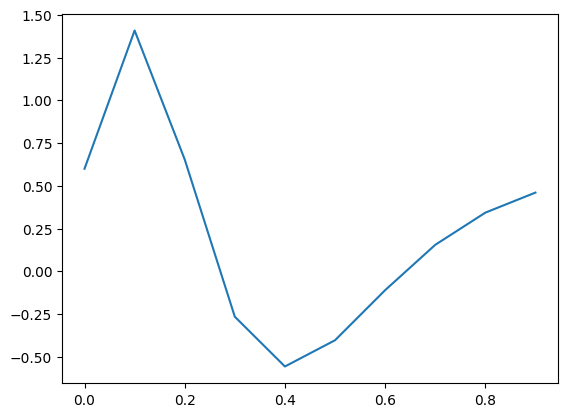

In [1266]:
nbData = 10
x=[i/nbData for i in range(nbData)]
y = [myFunction(i) for i in x]
plt.plot(x,y)

In [1267]:
# split train/test
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.4)

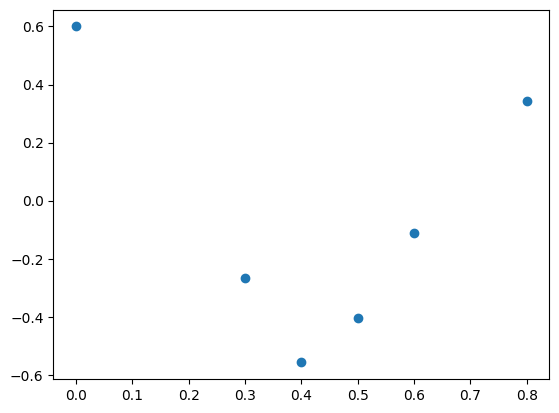

In [1268]:
#draw the samples from the training set
plt.scatter(xTrain,yTrain)

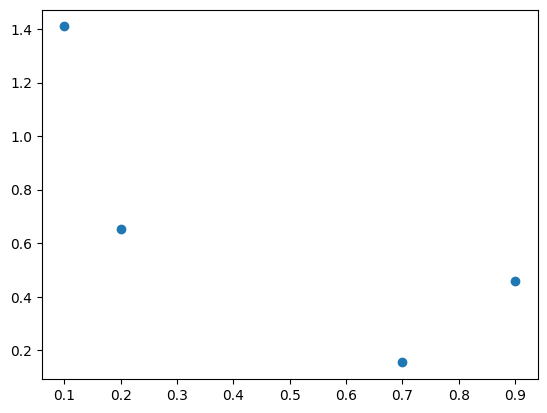

In [1269]:
# and the test dataset
plt.scatter(xTest,yTest)

### the neural network

In [1270]:
#topology
model = Sequential()
model.add(Dense(50, input_dim=1, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='rmsprop',loss='mse')

In [1271]:
model.summary()

Model: "sequential_156"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_474 (Dense)           (None, 50)                100       
                                                                 
 dense_475 (Dense)           (None, 1)                 51        
                                                                 
Total params: 151 (604.00 Byte)
Trainable params: 151 (604.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [1272]:
#learning
model.fit(xTrain, yTrain, epochs=100, batch_size=128)


Epoch 1/100
1/1 [==============================] - 1s 544ms/step - loss: 0.1695
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 0.1660
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 0.1645
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 0.1635
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 0.1628
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 0.1623
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 0.1619
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 0.1615
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 0.1611
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 0.1608
Epoch 11/100
1/1 [==============================] - 0s 4ms/step - loss: 0.1605
Epoch 12/100
1/1 [==============================] - 0s 3ms/step - loss: 0.1602
Epoch 13/100
1/1 [==============================] - 0s 3ms/

In [1273]:
# evaluation of performance
yTrainPred = model.predict(xTrain)
yTestPred = model.predict(xTest)
score = model.evaluate(xTest,yTest)
print("score = %.2f" % (score))

1/1 [==============================] - 0s 70ms/step - loss: 0.6962
score = 0.70


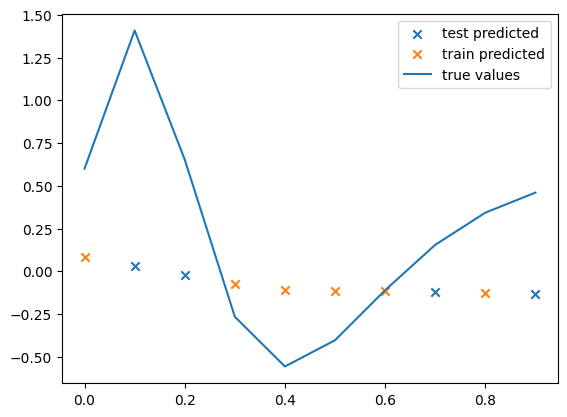

In [1274]:
# we plot the true values and the prediction
plt.scatter(xTest,yTestPred, marker='x', label='test predicted')
plt.scatter(xTrain,yTrainPred, marker='x',label='train predicted')
plt.plot(x,y, label='true values')
plt.legend()

Looking at this picture, you may see that both predictions from train or test are bad. You can improve this by answering to these questions:
- do you have enough data ? too much ?
    We didn't have enough data
- is the topology of the neural network too simple ? too complex ?
    We need to increase the amount of node
- are the parameters of the neural network well chosen ?
    We can choose different parameters which will be better for this case
- did stop the network too early (not converged) or too late (overfitting)?


## Regression using a toy dataset: diabetes

Your goal is to improve the results obtained with linear regression !

In [1275]:
# import diabetes dataset
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
x, y = diabetes.data, diabetes.target

print(x.shape)
print(y.shape)


# split train/test
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.1, random_state=42)




(442, 10)
(442,)


In [1276]:
model = Sequential()
model.add(Dense(128, input_dim=10, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam',loss='mse')

In [1277]:
model.summary()

Model: "sequential_157"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_476 (Dense)           (None, 128)               1408      
                                                                 
 dense_477 (Dense)           (None, 64)                8256      
                                                                 
 dense_478 (Dense)           (None, 32)                2080      
                                                                 
 dense_479 (Dense)           (None, 16)                528       
                                                                 
 dense_480 (Dense)           (None, 1)                 17        
                                                                 
Total params: 12289 (48.00 KB)
Trainable params: 12289 (48.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [1278]:
model.fit(xTrain, yTrain, epochs=500, batch_size=64)

Epoch 1/500
7/7 [==============================] - 0s 1ms/step - loss: 29065.7832
Epoch 2/500
7/7 [==============================] - 0s 1ms/step - loss: 28998.4844
Epoch 3/500
7/7 [==============================] - 0s 722us/step - loss: 28943.5801
Epoch 4/500
7/7 [==============================] - 0s 686us/step - loss: 28892.1543
Epoch 5/500
7/7 [==============================] - 0s 1ms/step - loss: 28837.2676
Epoch 6/500
7/7 [==============================] - 0s 2ms/step - loss: 28795.5059
Epoch 7/500
7/7 [==============================] - 0s 1ms/step - loss: 28739.3496
Epoch 8/500
7/7 [==============================] - 0s 2ms/step - loss: 28636.4238
Epoch 9/500
7/7 [==============================] - 0s 11ms/step - loss: 28488.3105
Epoch 10/500
7/7 [==============================] - 0s 1ms/step - loss: 28320.0801
Epoch 11/500
7/7 [==============================] - 0s 922us/step - loss: 28146.8262
Epoch 12/500
7/7 [==============================] - 0s 4ms/step - loss: 27976.9141
Epoch 

In [1279]:
yTrainPred = model.predict(xTrain)
yTestPred = model.predict(xTest)
score = model.evaluate(xTest,yTest)
print("score = %.2f" % (score))

#calculate accuracy
from sklearn.metrics import r2_score
print("r2 score on train = %.2f" % (r2_score(yTrain, yTrainPred)))
print("r2 score on test = %.2f" % (r2_score(yTest, yTestPred)))


2/2 [==============================] - 0s 2ms/step - loss: 3122.9678
score = 3122.97
r2 score on train = 0.78
r2 score on test = 0.49
